# Projet d'Analyse Exploratoire des Données Netflix 

## Membres de l'Équipe
- **TOUILEB Othmane** - Groupe 15
- **MGOUNI IDRISSI Meryem** - Groupe 15

---

![Netflix Logo](https://upload.wikimedia.org/wikipedia/commons/7/7a/Logonetflix.png)

## *Introduction*

Welcome to the exploratory data analysis (EDA) of Netflix shows! In this notebook, we will dive into the dataset containing information about various shows available on Netflix. By performing EDA, we aim to gain insights, discover patterns, and uncover interesting trends within the data.

Netflix has become one of the leading streaming platforms, offering a vast library of TV shows and movies across different genres. As a Netflix user or someone interested in the entertainment industry, this EDA will provide you with a better understanding of the shows available on the platform.

Pour commencer, nous devons préparer l'environnement en important les bibliothèques nécessaires et en chargeant le dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
df = pd.read_csv('C:\\Users\\othma\\OneDrive\\Desktop\\netflix.csv')




shows rows and columns

In [2]:
df.shape

(8807, 12)

Afficher les premières lignes du dataset pour un aperçu initial

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 1. Comptage des catégories)

In [4]:
top_categories = df['listed_in'].value_counts().head(5)

# Affichage des résultats)

In [5]:
print("Top 5 des catégories :\n", top_categories)

Top 5 des catégories :
 listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Name: count, dtype: int64


# Visualisation (Bonus)show()

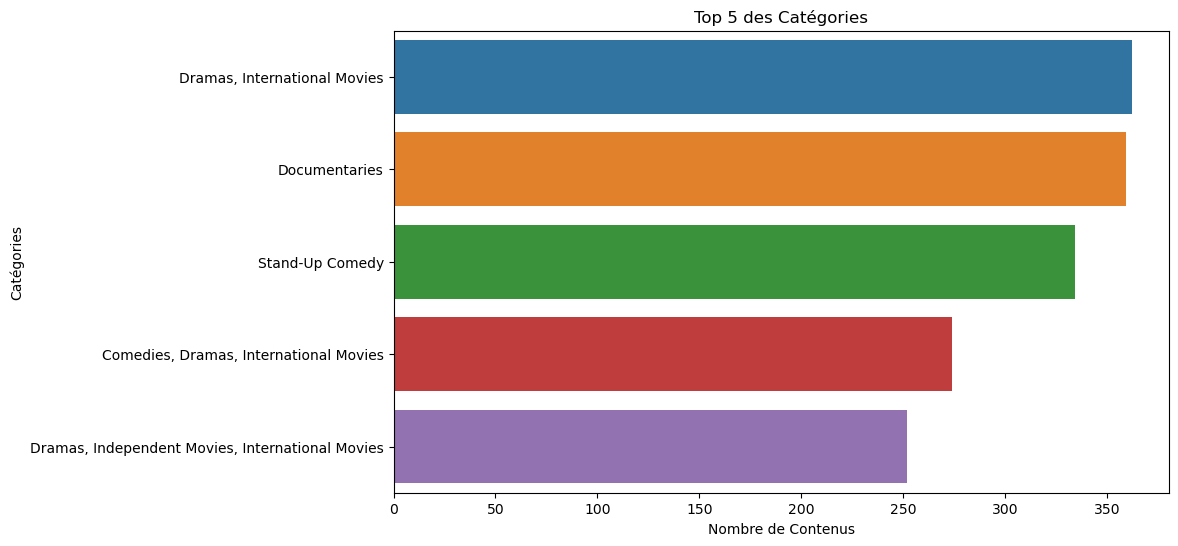

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 5 des Catégories')
plt.xlabel('Nombre de Contenus')
plt.ylabel('Catégories')
plt.show()

# 2. Comptage des réalisateurs)

In [7]:
top_directors = df['director'].value_counts().head(5)

# Affichage des résultats


In [8]:
print("Top 5 des réalisateurs :\n", top_directors)

Top 5 des réalisateurs :
 director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Name: count, dtype: int64


# Visualisation (Bonus)show()

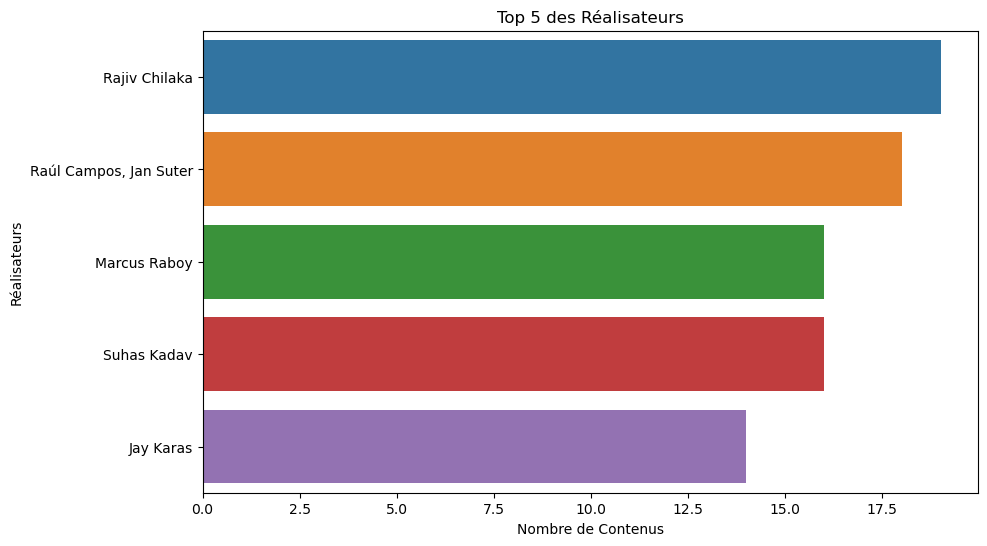

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 5 des Réalisateurs')
plt.xlabel('Nombre de Contenus')
plt.ylabel('Réalisateurs')
plt.show()

# 3. Séparer les acteurs par des virgules et compter les occurrences

In [10]:
actor_series = df['cast'].dropna().apply(lambda x: x.split(', '))
actor_list = [actor for sublist in actor_series for actor in sublist]
top_actors = pd.Series(actor_list).value_counts().head(10)

# Affichage des résultats


In [11]:
print("Top 10 des acteurs :\n", top_actors)

Top 10 des acteurs :
 Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: count, dtype: int64


# Visualisation (Bonus)

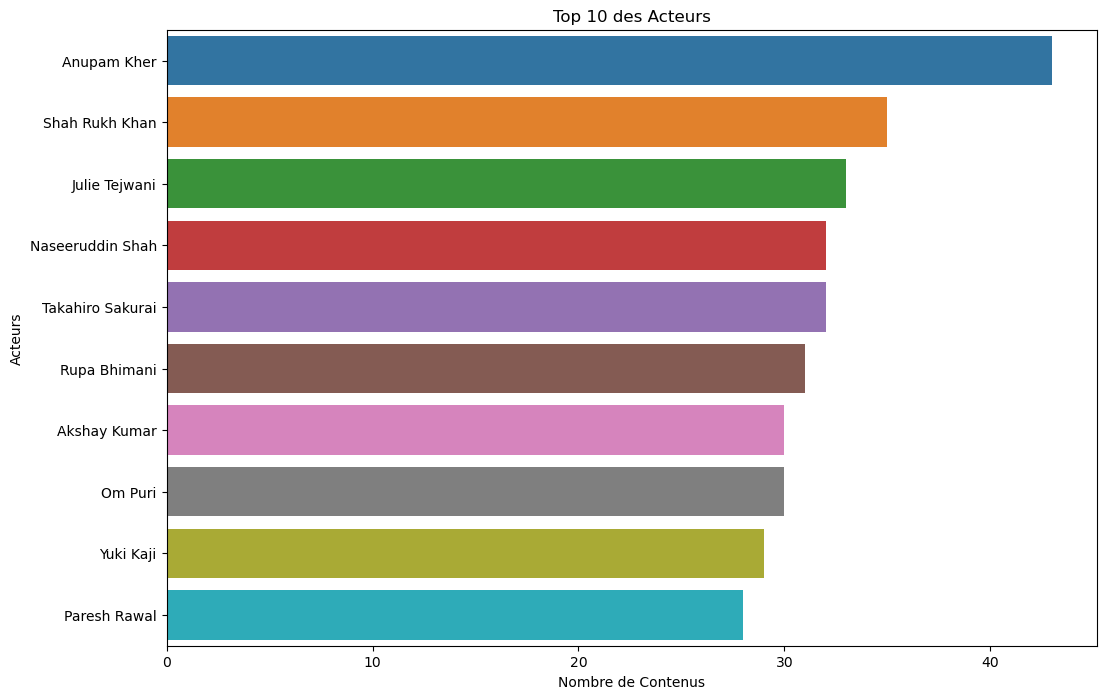

In [12]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_actors.values, y=top_actors.index)
plt.title('Top 10 des Acteurs')
plt.xlabel('Nombre de Contenus')
plt.ylabel('Acteurs')
plt.show()

# 4. Filtrer les séries télévisées et trier par nombre de saisons

In [13]:
tv_shows = df[df['type'] == 'TV Show']
top_tv_shows = tv_shows.sort_values(by='duration', ascending=False).head(5)

# Affichage des résultats


In [14]:
print("Top 5 des séries télévisées avec le plus grand nombre de saisons :\n", top_tv_shows[['title', 'duration']])

Top 5 des séries télévisées avec le plus grand nombre de saisons :
                               title   duration
1480                     Still Game  9 Seasons
6504       Club Friday The Series 6  9 Seasons
67                Saved by the Bell  9 Seasons
1998               Call the Midwife  9 Seasons
8     The Great British Baking Show  9 Seasons


# Visualisation (Bonus)

In [15]:
# Convert 'duration' column to string type to ensure consistency
top_tv_shows['duration'] = top_tv_shows['duration'].astype(str)

# Extract numeric part from 'duration' column
top_tv_shows['duration_numeric'] = top_tv_shows['duration'].str.extract('(\d+)', expand=False)

# Convert the extracted numeric part to numeric type
top_tv_shows['duration_numeric'] = pd.to_numeric(top_tv_shows['duration_numeric'])

# Check the result
print(top_tv_shows[['duration', 'duration_numeric']].head())


       duration  duration_numeric
1480  9 Seasons                 9
6504  9 Seasons                 9
67    9 Seasons                 9
1998  9 Seasons                 9
8     9 Seasons                 9


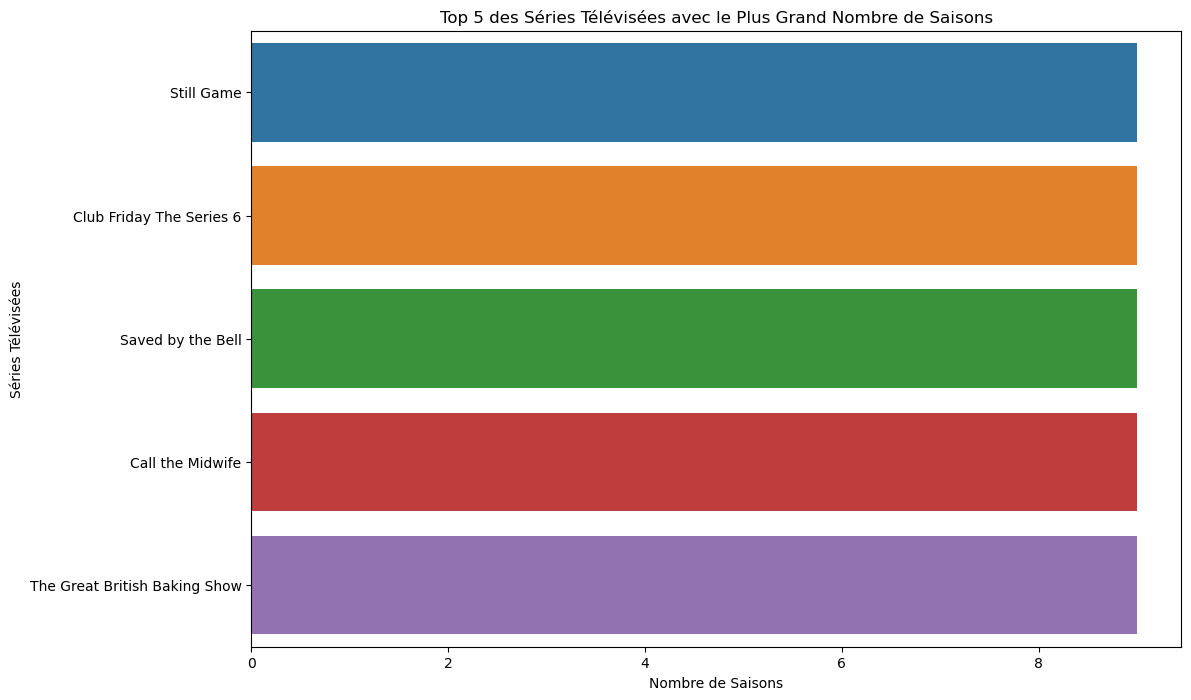

In [16]:
# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x=top_tv_shows['duration_numeric'], y=top_tv_shows['title'])
plt.title('Top 5 des Séries Télévisées avec le Plus Grand Nombre de Saisons')
plt.xlabel('Nombre de Saisons')
plt.ylabel('Séries Télévisées')
plt.show()


# 5. Identifier des Contenus Similaires en Faisant Correspondre des Caractéristiques Textuelles
Pour trouver des contenus similaires, nous allons utiliser des techniques de traitement du langage naturel (NLP) comme le TF-IDF pour mesurer la similarité entre les descriptions des contenus.

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Convertir les descriptions en matrices TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['description'].fillna(''))

# Calculer la similarité cosinus entre les descriptions
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Fonction pour obtenir des recommandations basées sur la similarité
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = df[df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # Obtenir les 5 contenus les plus similaires
    content_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[content_indices]




# Exemple d'utilisation 1


In [18]:
print("Contenus similaires à 'Stranger Things' :\n", get_recommendations('Stranger Things'))

Contenus similaires à 'Stranger Things' :
 4733              Rowdy Rathore
1240                 Safe Haven
1487            Sakho & Mangane
8198    The Autopsy of Jane Doe
2419              Big Stone Gap
Name: title, dtype: object


# Exemple d'utilisation 2


In [19]:
print("Contenus similaires à 'Breaking Bad' :\n", get_recommendations('Breaking Bad'))

Contenus similaires à 'Breaking Bad' :
 1920    The Book of Sun
1798       Alice Junior
4118        Iron Ladies
6616          Dismissed
2388      Alexa & Katie
Name: title, dtype: object


# 6. Concentration de Netflix sur les Séries Télévisées vs Films ces Dernières Années
Pour analyser cette question, nous allons comparer le nombre de séries télévisées et de films ajoutés chaque année.

## Extraire l'année de sortie



In [20]:
# Convert 'date_added' to datetime, coercing errors
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract the year from 'date_added'
df['release_year'] = df['date_added'].dt.year

# Check the result
print(df[['date_added', 'release_year']].head())


  date_added  release_year
0 2021-09-25        2021.0
1 2021-09-24        2021.0
2 2021-09-24        2021.0
3 2021-09-24        2021.0
4 2021-09-24        2021.0


In [21]:
df['release_year'] = pd.to_datetime(df['date_added']).dt.year

## Comptage des types de contenus par année


In [22]:
type_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

## Visualisation

<Figure size 1400x800 with 0 Axes>

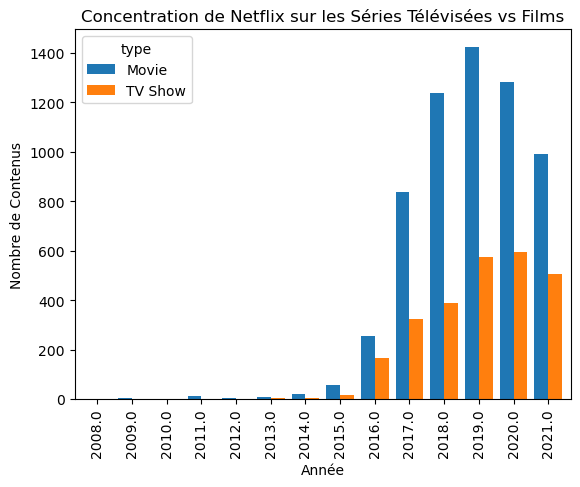

In [23]:
plt.figure(figsize=(14, 8))
type_by_year.plot(kind='bar',width=0.8, stacked=False)
plt.title('Concentration de Netflix sur les Séries Télévisées vs Films')
plt.xlabel('Année')
plt.ylabel('Nombre de Contenus')
plt.show()

# ******************************* FIN DE PROJET ****************************

# ********************* Partie BONUS (j'ai -4) :'( ******************************

# Bonus 1
## Heatmap to explore the top countries contributing to the Netflix shows

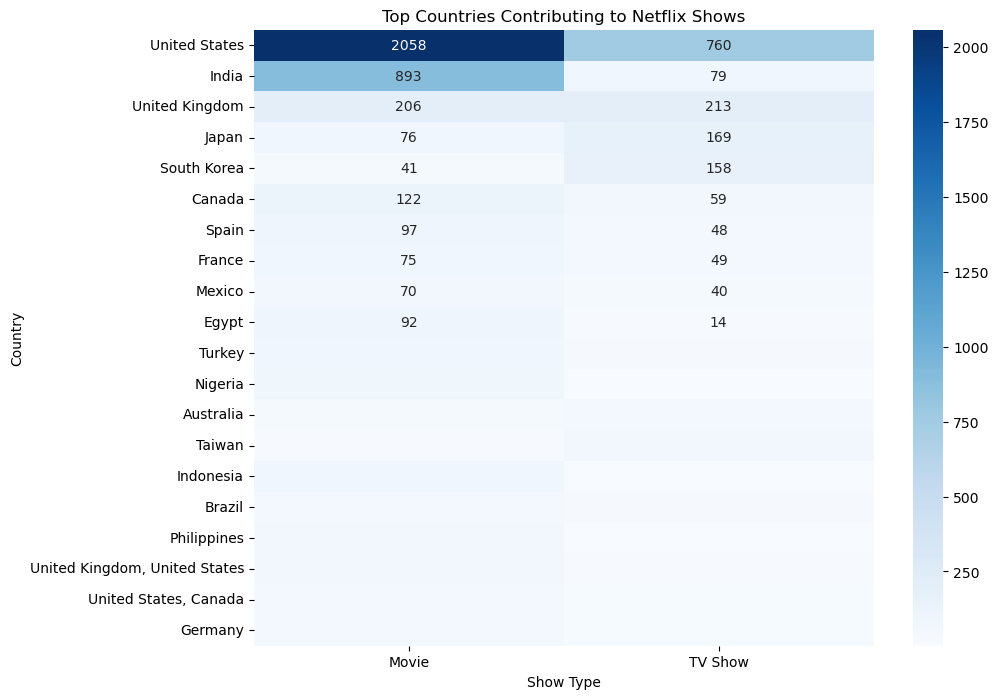

In [24]:

plt.figure(figsize=(10, 8))  # Increase the height to accommodate more rows

# Your existing code for creating the heatmap
country_counts = df['country'].value_counts().head(20)
top_countries = country_counts.index
country_show_types = df[df['country'].isin(top_countries)].pivot_table(index='country', columns='type', aggfunc='size', fill_value=0)

# Reindexing to ensure all 10 countries are included
country_show_types = country_show_types.reindex(top_countries)

sns.heatmap(country_show_types, cmap='Blues', annot=True, fmt='d', cbar=True)
plt.title('Top Countries Contributing to Netflix Shows')
plt.xlabel('Show Type')
plt.ylabel('Country')
plt.show()


# Bonus 2
## Word cloud to visualize the most frequent words in the show titles

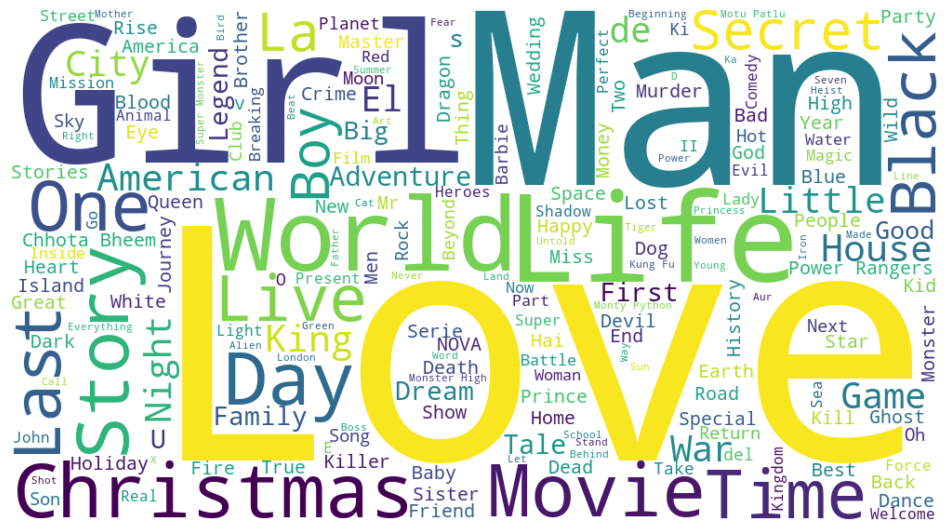

In [7]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('C:\\Users\\othma\\OneDrive\\Desktop\\netflix.csv')

# Assuming the column containing show titles is named 'title'
# Replace 'title' with the actual column name if different
titles = df['title'].dropna().astype(str)

# Combine all titles into a single string
text = ' '.join(titles)

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=550, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Bonus 3
## using the TextBlob library for sentiment analysis and matplotlib for visualization. We'll visualize the sentiment polarity of the text data. Here's how you can do it:

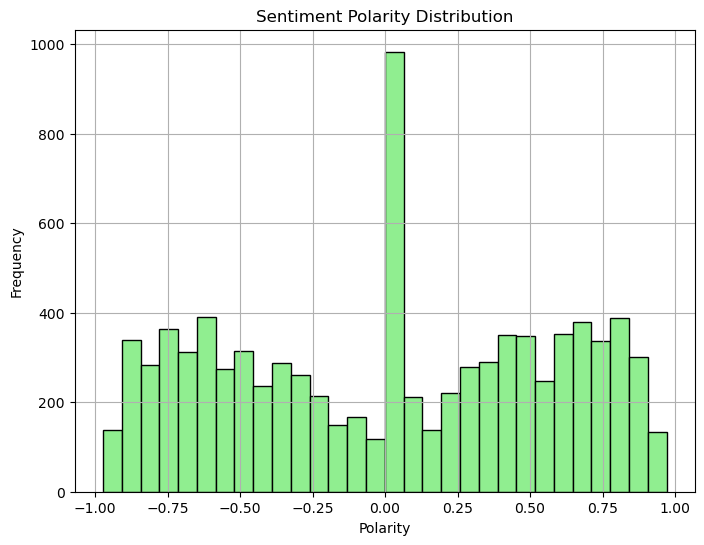

In [16]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Download VADER lexicon if not already downloaded
#nltk.download('vader_lexicon')

# Initialize SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Assuming you have a DataFrame df with a column named 'description'
texts = df['description'].astype(str)

# Perform sentiment analysis on each text
sentiment_scores = texts.apply(lambda x: sid.polarity_scores(x)['compound'])

# Plot sentiment polarity distribution
plt.figure(figsize=(8, 6))
plt.hist(sentiment_scores, bins=30, color='lightgreen', edgecolor='black')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
